## 1. Trend of International Destination
### Questions to answer
- How has the distribution between domestic and international travel changed over time?
- Which regions have been the most frequently traveled to? 
- Are there seasonal differences?

Import libraries and loaded data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  
from matplotlib.ticker import PercentFormatter, FuncFormatter
import matplotlib.ticker as ticker

df = pd.read_csv(r'C:\Users\Dell\DA_FILE\100_My_Project\10_SFO_airtraffic\workingsheet.csv')

sns.set_style('ticks')

df['date']=pd.to_datetime(df['Activity Period Start Date'])
df['month']=df['date'].dt.month
df['year']=df['date'].dt.year

#### Domestic vs international travel over time

Created a new Dataframe `df_national` to calculate the yearly distribution of international and domestic passengers.

In [2]:
df_national=df.pivot_table(index='year',columns='GEO Summary', values='Passenger Count', aggfunc='sum')

In [3]:
df_national_perc = df_national.copy()

In [4]:
#Calculate percentage
df_national_perc['sum']= df_national_perc.sum(axis=1)
df_national_perc['Domestic']=df_national_perc['Domestic'].div(df_national_perc['sum']/100)
df_national_perc['International']=df_national_perc['International'].div(df_national_perc['sum']/100)
df_national_perc.drop('sum',axis=1,inplace=True)

Visualize using a horizontal stacked bar chart to observe yearly changes.

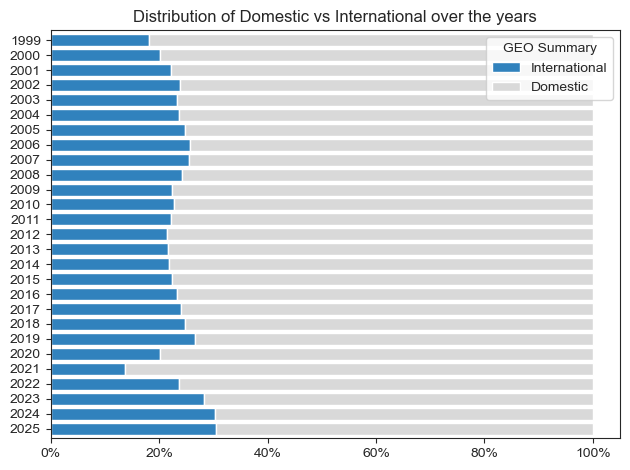

In [ ]:
df_national_perc[['International','Domestic']].plot(kind='barh',stacked=True,width=0.8,colormap='tab20c')
plt.gca().invert_yaxis()
plt.title('Distribution of Domestic vs International over the years')
plt.ylabel('')
plt.gca().xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.tight_layout()
plt.show()

- Distribution of international passengers has steadily increased since 1999
- Currently, about 30% of passengers at SFO travel international.
  

#### Most traveled regions? 


Created a new Dataframe `df_region` to aggregate total monthly passenger counts per region.

In [6]:
df_region =df.pivot_table(index='date',values='Passenger Count', columns='GEO Region', aggfunc='sum')

To limit top 5 countries, sort values and filtered to international region

In [ ]:
df_region.loc['sum',:]=df_region.sum(axis=0)
df_region = df_region.T.sort_values(by='sum',ascending=False).T
df_region.drop('sum',axis=0,inplace=True)
df_plot = df_region.iloc[:,1:6]

Visualized using a rolling average line chart.

In [30]:
from adjustText import adjust_text

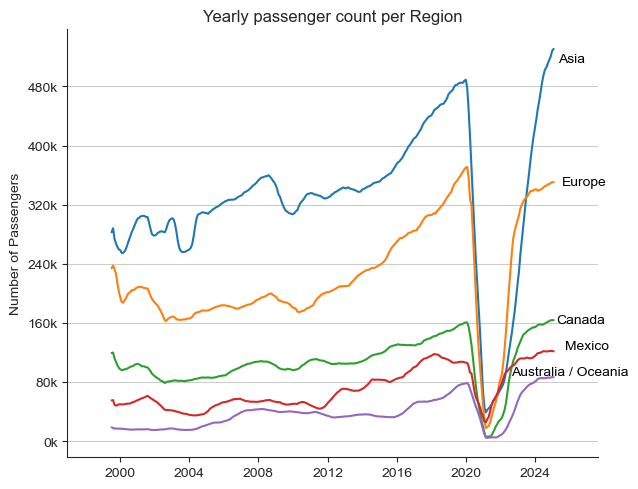

In [59]:
df_plot.rolling(window=12, min_periods=1).mean().plot(figsize=(6.5,5))
plt.margins(x=0.2)
texts = []
for i in range(5):
    texts.append(plt.text(20000, df_plot.iloc[-11, i], df_plot.columns[i], color='black'))
adjust_text(texts, expand=(1.5,1.5))

plt.legend().remove()
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(8))
plt.xticks(rotation=0 , ha='center') 
plt.grid(axis='y')
plt.margins(x=0.1)
plt.xlabel('')
plt.ylabel('Number of Passengers')
plt.title('Yearly passenger count per Region')
sns.despine()
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos : f'{(x/1000):.0f}k'))
plt.tight_layout()

- International flight passenger has been growing constantly except during the pandemic.
- Especially, Asia passenger traffic has surpassed pre-pandemic and remains the most popular international region.

#### Is there difference of traffic per month?

Created a new Dataframe to analyze the average monthly passenger count for top 5 international regions.

In [64]:
df_monthly = df.pivot_table(index='month', columns='GEO Region', values='Passenger Count',aggfunc='mean')

Filtered to the top 5 international regions.

In [65]:
df_monthly_top=df_monthly.copy()
df_monthly_top.loc['sum']= df_monthly_top.sum(axis=0)
df_monthly_top = df_monthly_top.T.sort_values(by='sum',ascending=False).T
df_monthly_top = df_monthly_top.drop('sum')
df_monthly_top= df_monthly_top.iloc[:,1:6]

Visualized monthly averages by region

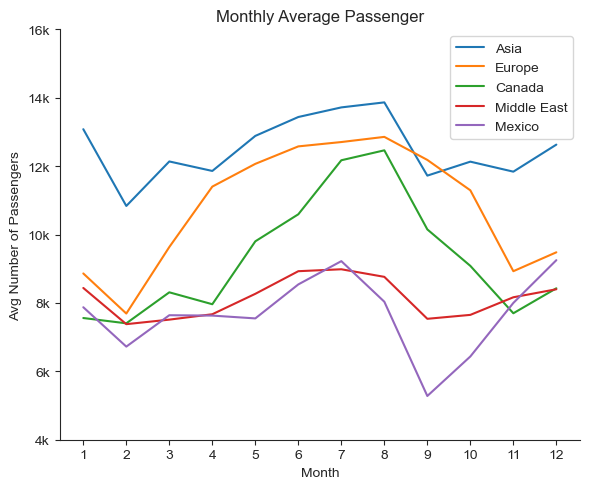

In [67]:
df_monthly_top.plot(title='Monthly Average Passenger', ylim=(4000,16000),figsize=(6,5))

plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos : f'{(x/1000):.0f}k'))
plt.legend(title='')
plt.ylabel('Avg Number of Passengers')
plt.xlabel('Month')
plt.xticks(ticks=range(0,12),labels=range(1,13))
sns.despine()
plt.tight_layout()
plt.show()

Asia/ Middle East : Passenger traffic peaks during summer and lowest in February.

Europe/ Canada : Dips in January-February (8k passengers), peaks in July-August (12k passengers).

Mexico : Most popular in December, and lowest in September.